## Preparación del notebook

In [1]:
# Importar Librerias
# ==============================================================================
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# Cargar datos
# ==============================================================================
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
print(dataframe.shape)

(768, 9)


In [2]:
# Separación de caracteristicas y target
# ==============================================================================
X = dataframe.drop(columns = "class")
y = dataframe['class']

# split de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [8]:
X.head(3)

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


## Decision Tree Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [4]:
# Entrenamiento del modelo
# ==============================================================================
clf = tree.DecisionTreeClassifier(
          criterion = 'gini',
          max_depth = 6,
          max_leaf_nodes=10,
          random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=0)

In [5]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, clf.predict(X_train), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test), digits=4))

Train - Accuracy : 0.7736156351791531
Train - classification report:
               precision    recall  f1-score   support

           0     0.7714    0.9186    0.8386       393
           1     0.7808    0.5158    0.6213       221

    accuracy                         0.7736       614
   macro avg     0.7761    0.7172    0.7299       614
weighted avg     0.7748    0.7736    0.7603       614

Test - Accuracy : 0.7792207792207793
Test - classification report :               precision    recall  f1-score   support

           0     0.7920    0.9252    0.8534       107
           1     0.7241    0.4468    0.5526        47

    accuracy                         0.7792       154
   macro avg     0.7581    0.6860    0.7030       154
weighted avg     0.7713    0.7792    0.7616       154



In [6]:
from sklearn.metrics import recall_score
print ("Train - recall:\n", metrics.recall_score(y_train, clf.predict(X_train)))
print ("Test - recall :", metrics.recall_score(y_test, clf.predict(X_test)))

Train - recall:
 0.5158371040723982
Test - recall : 0.44680851063829785


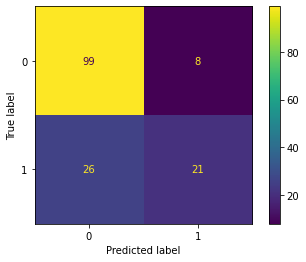

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, clf.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

Profundidad del árbol: 5
Número de nodos terminales: 10


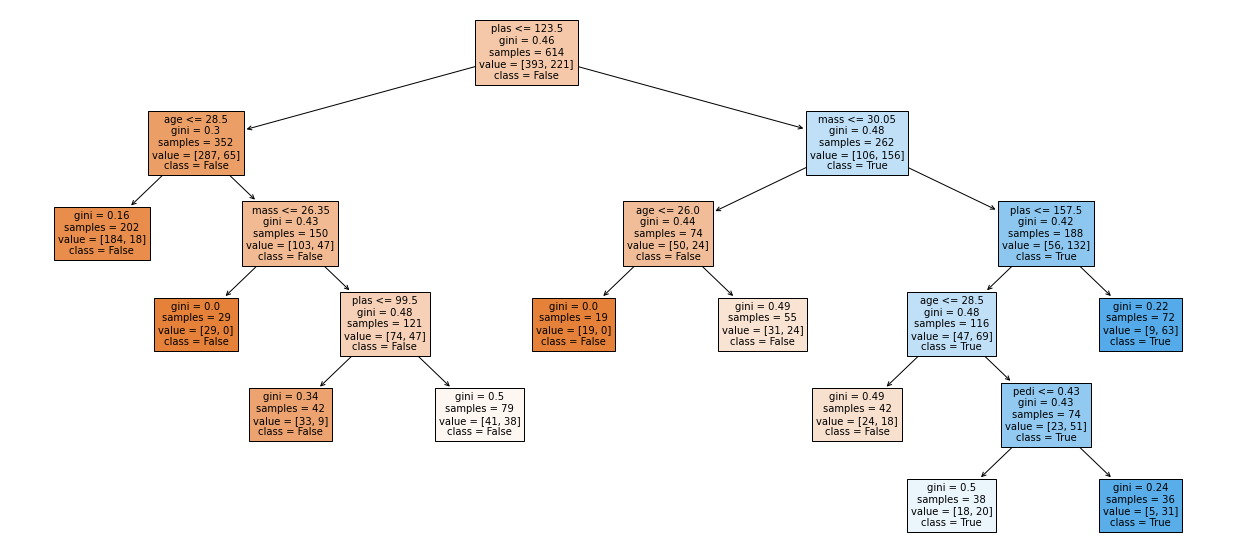

In [10]:
# Visualización del arbol
# ==============================================================================
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = X.columns.tolist(),
            class_names   = ['False', 'True'],
            filled        = True,
            impurity      = True,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

## Random Forest Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [14]:
from sklearn.ensemble import RandomForestClassifier
# Entrenamiento del modelo
# ==============================================================================
ranfor = RandomForestClassifier(
            n_estimators = 150,
            criterion    = 'gini',
            #max_depth    = 5,
            #max_leaf_nodes = 10,
            n_jobs       = -1,
            random_state = 123
         )
ranfor.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=123)

In [15]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       221

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Test - Accuracy : 0.8181818181818182
Test - classification report :               precision    recall  f1-score   support

           0       0.86      0.89      0.87       107
           1       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154



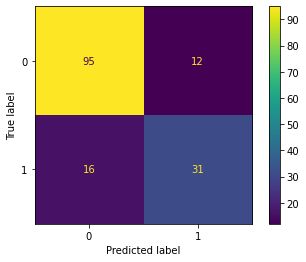

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, ranfor.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

## Gradient Boosting Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Entrenamiento del modelo: N_ESTIMATORS = 100, LEARNING_RATE = 0.1, , MAX_DEPTH = 4
# ===================================================================================
gboos = GradientBoostingClassifier(
            n_estimators = 100,
            learning_rate= 0.1,
            max_depth = 4,
            random_state = 123
         )
gboos.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=123)

In [18]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, gboos.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, gboos.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test)))

Train - Accuracy : 0.9771986970684039
Train - classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       393
           1       0.99      0.95      0.97       221

    accuracy                           0.98       614
   macro avg       0.98      0.97      0.98       614
weighted avg       0.98      0.98      0.98       614

Test - Accuracy : 0.8051948051948052
Test - classification report :               precision    recall  f1-score   support

           0       0.87      0.85      0.86       107
           1       0.67      0.70      0.69        47

    accuracy                           0.81       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.81      0.81      0.81       154



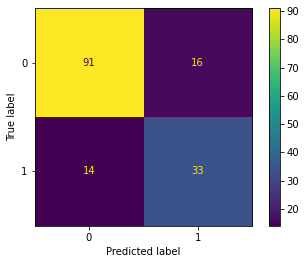

In [19]:
# Matriz de confusión
# ==============================================================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, gboos.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

## XGB Classifier

https://xgboost.readthedocs.io/en/stable/get_started.html

In [20]:
#%pip install xgboost
from xgboost import XGBClassifier

# Entrenamiento del modelo: N_ESTIMATORS = 100, LEARNING_RATE = 0.1, , MAX_DEPTH = 4
# ===================================================================================
xgb = XGBClassifier(
    n_estimators = 100,
    learning_rate= 0.1,
    max_depth = 4,
    random_state = 123
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [21]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, xgb.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, xgb.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, xgb.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, xgb.predict(X_test)))

Train - Accuracy : 0.9332247557003257
Train - classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       393
           1       0.94      0.87      0.90       221

    accuracy                           0.93       614
   macro avg       0.93      0.92      0.93       614
weighted avg       0.93      0.93      0.93       614

Test - Accuracy : 0.8246753246753247
Test - classification report :               precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.70      0.74      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.83      0.82      0.83       154



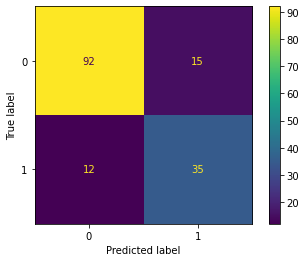

In [22]:
# Matriz de confusión
# ==============================================================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, xgb.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

## Support Vector Machine

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [23]:
from sklearn.svm import SVC

# Entrenamiento del modelo SVM: KERNEL = 'linear', C = 1.5, class_weight = 'balanced'
# =================================================================================
svm_model = SVC(
                C = 1.5, 
                kernel = 'linear',
                class_weight = 'balanced',
                max_iter =-1, 
                random_state=123)
svm_model.fit(X_train, y_train)

SVC(C=1.5, class_weight='balanced', kernel='linear', random_state=123)

In [24]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm_model.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, svm_model.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm_model.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, svm_model.predict(X_test)))

Train - Accuracy : 0.7671009771986971
Train - classification report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       393
           1       0.66      0.74      0.70       221

    accuracy                           0.77       614
   macro avg       0.75      0.76      0.75       614
weighted avg       0.78      0.77      0.77       614

Test - Accuracy : 0.7857142857142857
Test - classification report :               precision    recall  f1-score   support

           0       0.89      0.79      0.84       107
           1       0.62      0.77      0.69        47

    accuracy                           0.79       154
   macro avg       0.75      0.78      0.76       154
weighted avg       0.80      0.79      0.79       154



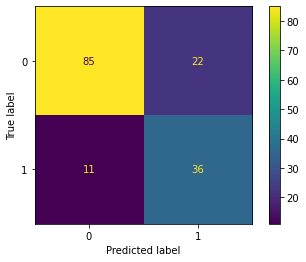

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, svm_model.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()